# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W ninejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [1]:
from typing import List
from math import sqrt
from matplotlib.pyplot import arrow, show


class Vector:
    __data: List = None
    
    def __init__(self, data: List):
        self.__data = data
    
    def __len__(self):
        return len(self.__data)
    
    def __add__(self, data):
        self.__validate_length_of_vectors(data)
        
        for i in range(len(self.__data)):
            self.__data[i] += data.to_list()[i]
        
        return self
    
    def __sub__(self, data):
        self.__validate_length_of_vectors(data)
    
        for i in range(len(self.__data)):
            self.__data[i] -= data.to_list()[i]
        
        return self
    
    def __str__(self):
        return f'{self.__data}'

    def __repr__(self):
        return f'<{self.__class__.__name__}({self.__data}) at {hex(id(self))}>'
    
    def __validate_length_of_vectors(self, data):
        if len(self.__data) != len(data.to_list()):
            raise ValueError('Vectors should be of the same size')
    
    def __validate_length_of_vector_for_plot(self):
        if len(self.__data) != 2:
            raise ValueError('Vector should be 2 dimentional (size of 2)')
    
    def __eq__(self, data):
        self.__validate_length_of_vectors(data)
        return Vector([value1 == value2 for value1, value2 in zip(self.__data, data.to_list())])

    def __lt__(self, data):
        self.__validate_length_of_vectors(data)
        return Vector([value1 < value2 for value1, value2 in zip(self.__data, data.to_list())])
        
    def __gt__(self, data):
        self.__validate_length_of_vectors(data)
        return Vector([value1 > value2 for value1, value2 in zip(self.__data, data.to_list())])
    
    def __le__(self, data):
        self.__validate_length_of_vectors(data)
        return Vector([value1 <= value2 for value1, value2 in zip(self.__data, data.to_list())])
        
    def __ge__(self, data):
        self.__validate_length_of_vectors(data)
        return Vector([value1 >= value2 for value1, value2 in zip(self.__data, data.to_list())])
        
    def __ne__(self, data):
        self.__validate_length_of_vectors(data)
        return Vector([value1 != value2 for value1, value2 in zip(self.__data, data.to_list())])
    
    def __hash__(self):
        return hash(tuple(self.__data))
    
    def __validate_if_value_is_scalar(self, value):
        if not isinstance(value, (int, float)):
            raise ValueError('Given value is not a scalar')
    
    def __truediv__(self, value):
        self.__validate_if_value_is_scalar(value)
        
        if value == 0:
            raise ArithmeticError('Can not divide by 0')
        
        self.__data = [data / value for data in self.__data]
        return self
    
    def __mul__(self, value):
        self.__validate_if_value_is_scalar(value)
        self.__data = [data * value for data in self.__data]  
        return self 
    
    def calculate_cube_vector(self):
        return sqrt(sum([value ** 2 for value in self.__data]))
    
    def to_list(self) -> List:
        return self.__data
    
    def plot_vector(self):
        self.__validate_length_of_vector_for_plot()
        arrow(0, 0, self.__data[0], self.__data[1], head_width=0.1, head_length=0.1, fc='k', ec='k')
        show()        
        
vec = Vector([1, 2])
print(f'Wektor = {vec}, moduł wektora: {vec.calculate_cube_vector()}, dodawanie {vec + vec}, odejmowanie {vec - vec}')

Wektor = [1, 2], moduł wektora: 2.23606797749979, dodawanie [2, 4], odejmowanie [0, 0]


In [2]:
vec

<Vector([0, 0]) at 0x2af206a5a90>

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów (ich modułów) za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [3]:
vec1 = Vector([1, 2, 3])
vec2 = Vector([3, 2, 1])

In [4]:
vec1 == vec2

<Vector([False, True, False]) at 0x2af206f9c40>

In [5]:
vec1 <= vec2

<Vector([True, True, False]) at 0x2af206f9f10>

In [6]:
vec1 >= vec2

<Vector([False, True, True]) at 0x2af206f95b0>

In [7]:
vec1 < vec2

<Vector([True, False, False]) at 0x2af206f93d0>

In [8]:
vec1 > vec2

<Vector([False, False, True]) at 0x2af206f9070>

In [9]:
vec1 != vec2

<Vector([True, False, True]) at 0x2af206f6550>

### Zadanie 3

Do klasy `Vector` dopisz funkcję umożliwiającą wyświetlenie wektora na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

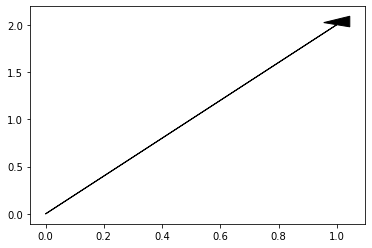

In [10]:
vec = Vector([1, 2])
vec.plot_vector()

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [11]:
{Vector([1, 2, 3]): 1}

{<Vector([1, 2, 3]) at 0x2af206f9790>: 1}

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [12]:
vec = Vector([1, 2, 3])

print(vec / 2)
print(vec * 2)
print(vec / 2.1)
print(vec * 2.2)

[0.5, 1.0, 1.5]
[1.0, 2.0, 3.0]
[0.47619047619047616, 0.9523809523809523, 1.4285714285714286]
[1.0476190476190477, 2.0952380952380953, 3.1428571428571432]


In [13]:
print(vec / 0)

ArithmeticError: Can not divide by 0